In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math


In [223]:
data=pd.read_csv("housing_prices.csv")
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,Seattle,USA


In [224]:
data.head(n=10)
# help(data.head)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,313000.0,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2384000.0,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,342000.0,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,420000.0,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,550000.0,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
5,490000.0,2.0,1.00,880.0,1.0,0.0,0.0,880.0,0.0,Seattle,USA
6,335000.0,2.0,2.00,1350.0,1.0,0.0,0.0,1350.0,0.0,Redmond,USA
7,482000.0,4.0,2.50,2710.0,2.0,0.0,0.0,2710.0,0.0,Maple Valley,USA
8,452500.0,3.0,2.50,2430.0,1.0,0.0,0.0,1570.0,860.0,North Bend,USA
9,640000.0,4.0,2.00,1520.0,1.5,0.0,0.0,1520.0,0.0,Seattle,USA


In [225]:
type(data.isnull())
dir(data)
print(data.isnull().sum())

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64


In [226]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.599000e+03,4599.000000,4594.000000,4566.000000,4589.000000,4587.000000,4594.000000,4593.000000,4598.000000
mean,5.520482e+05,3.400957,2.161515,2139.495401,1.512421,0.007194,0.240966,1828.236664,312.080252
std,5.638664e+05,0.908928,0.783815,964.974586,0.538369,0.084522,0.778864,862.420345,464.191681
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.234167e+05,3.000000,1.750000,1460.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1970.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.549750e+05,4.000000,2.500000,2620.000000,2.000000,0.000000,0.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


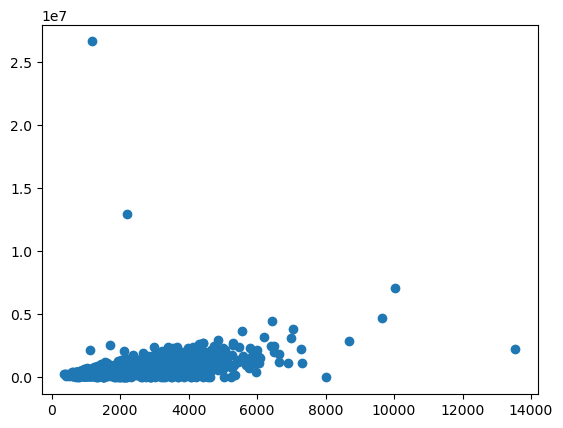

In [227]:
#عايز اشيل ال outliers من ال sqft_living عشان اخد المتوسط بتاعه احطه فال none values
plt.scatter(data['sqft_living'],data['price'])

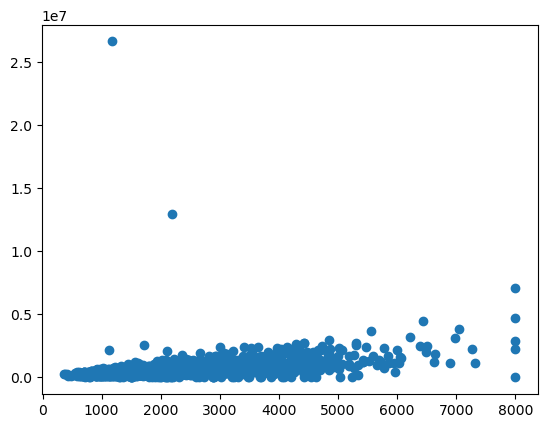

In [228]:
data["sqft_living"]=np.where(data['sqft_living']>8000,8000,data['sqft_living'])
plt.scatter(data['sqft_living'],data['price'])

In [229]:
#اشيل بقا النال اللي فيها واحط ال mean
data["sqft_living"].fillna(np.mean(data['sqft_living']))
#هتا هنشيل ال nulls اللس فال floors
data['floors'].fillna(1.5)
data.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [230]:
data.dropna(inplace=True)
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
country          0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

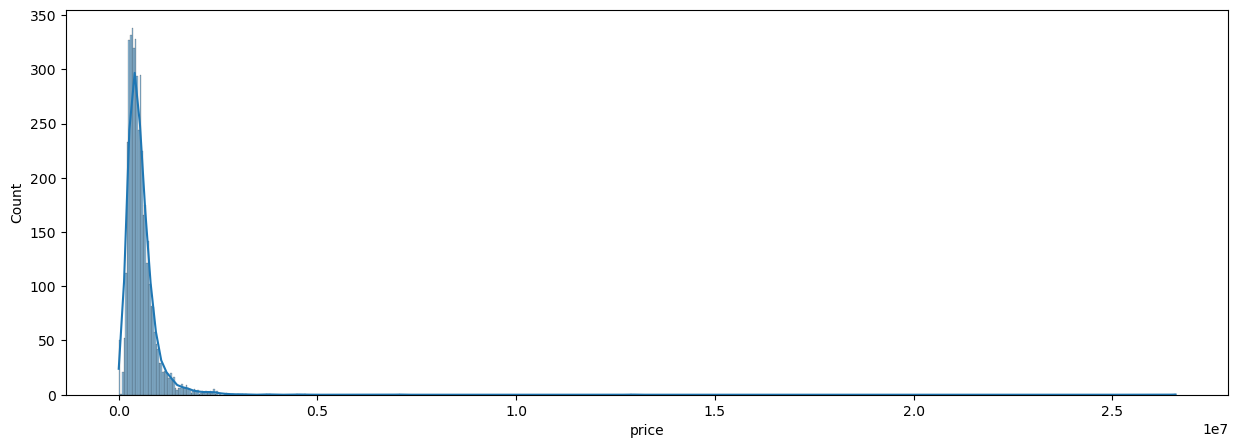

In [231]:
plt.figure(figsize=(15,5))
# plt.hist(data['price'],bins=1000)
sns.histplot(data["price"],kde=True)

3


<Axes: xlabel='price', ylabel='Count'>

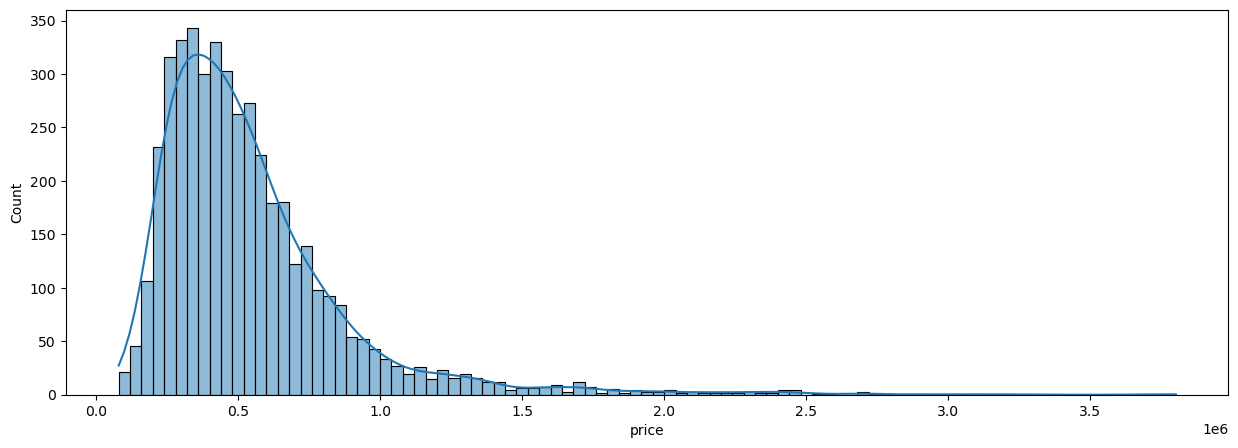

In [232]:
a=[data["price"]>.5*1e7]
print(np.sum(a))

# print(type(a))
# print(np.sum(a))
# data["price"]=data[data['price']>.4e7]
data=data[data['price']<.4*1e7]
data=data[data["price"]>40000]
plt.figure(figsize=(15,5))
sns.histplot(data["price"],kde=True)

In [233]:
# data["log_price"]=np.log(data["price"])
# plt.figure(figsize=(15,5))
# # plt.hist(data['price'],bins=1000)
# sns.histplot(data["log_price"],kde=True)

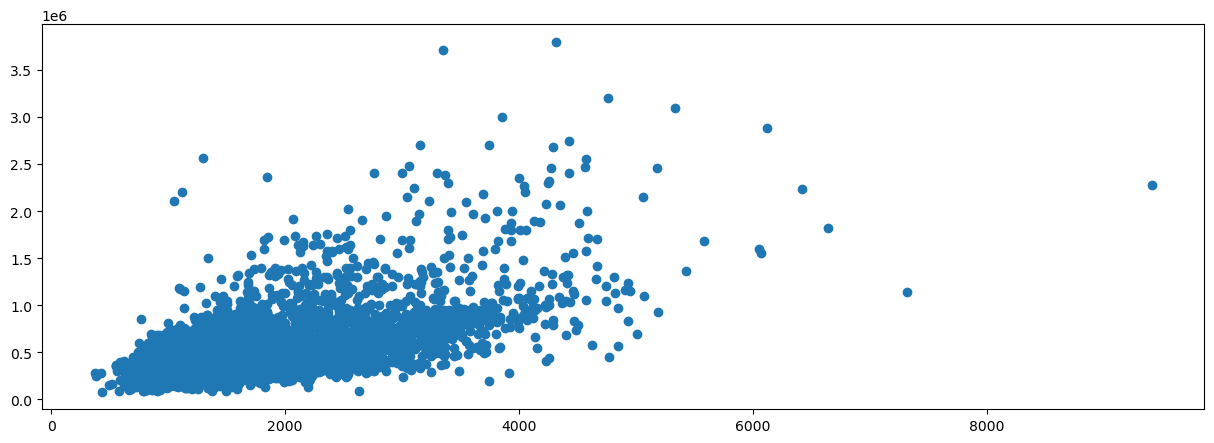

In [234]:
plt.figure(figsize=(15,5))
plt.scatter(data["sqft_above"],data["price"])

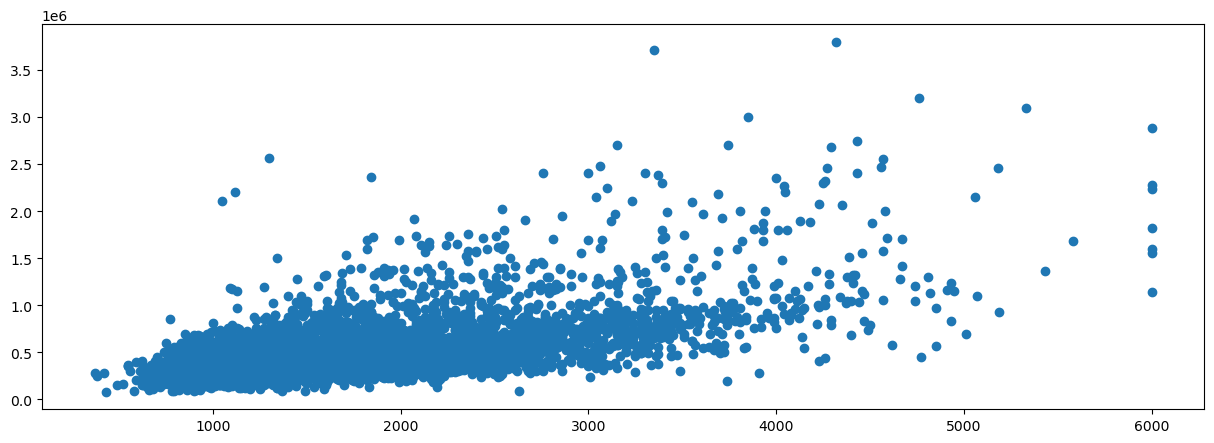

In [235]:
data["sqft_above"]=np.where(data["sqft_above"]>6000,6000,data["sqft_above"])
plt.figure(figsize=(15,5))
plt.scatter(data["sqft_above"],data["price"])



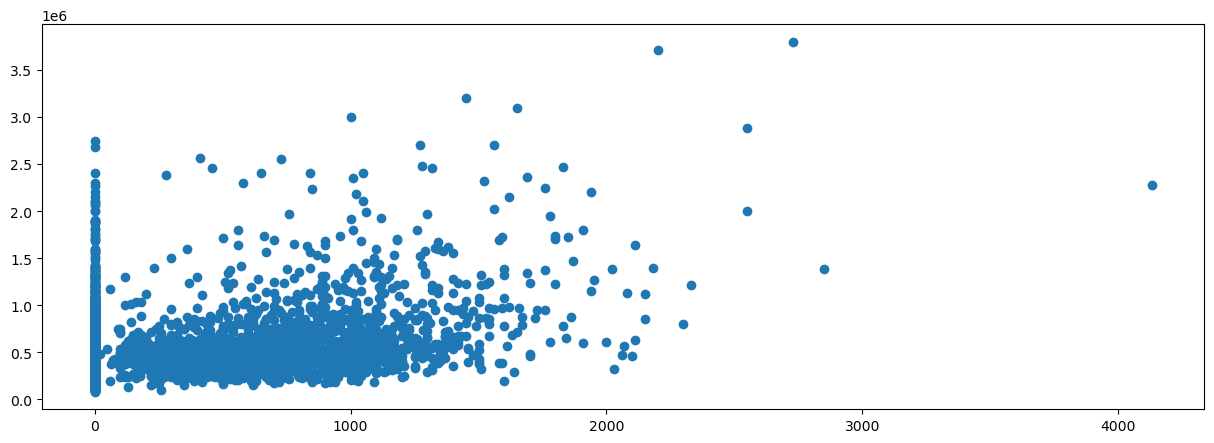

In [236]:
plt.figure(figsize=(15,5))
plt.scatter(data["sqft_basement"],data["price"])

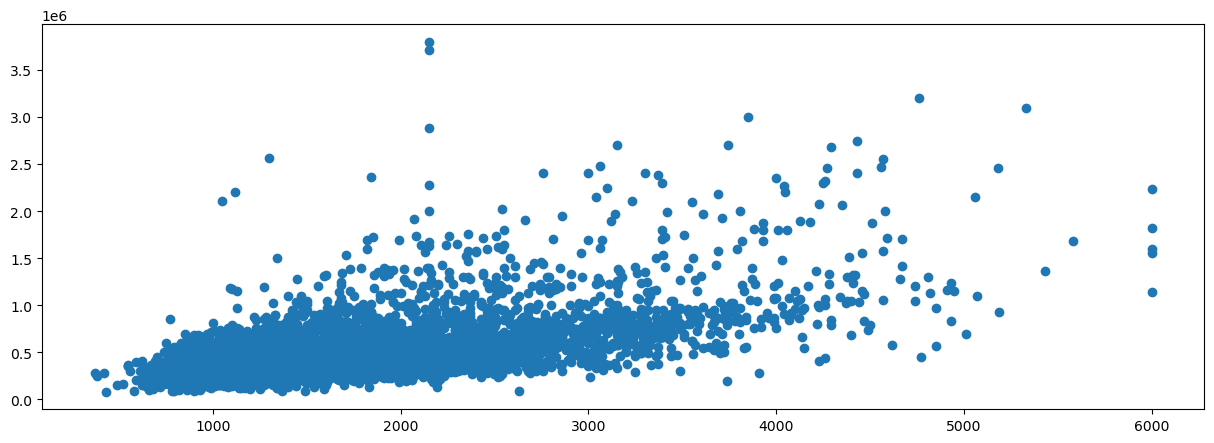

In [237]:
data["sqft_basement"]=np.where(data["sqft_basement"]>2150,2150,data["sqft_above"])
plt.figure(figsize=(15,5))
plt.scatter(data["sqft_basement"],data["price"])


bedrooms
0.0       2
1.0      37
2.0     549
3.0    1983
4.0    1490
5.0     330
6.0      59
7.0      14
8.0       2
9.0       1
Name: count, dtype: int64

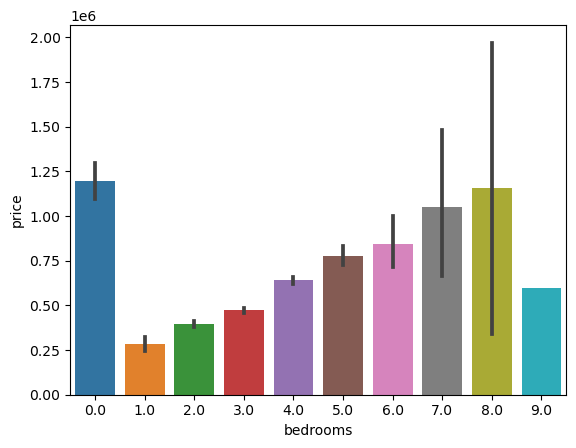

In [238]:
sns.barplot(x=data["bedrooms"],y=data["price"])
data["bedrooms"].value_counts().sort_index()


bedrooms
1.0      39
2.0     549
3.0    1983
4.0    1490
5.0     330
6.0      76
Name: count, dtype: int64

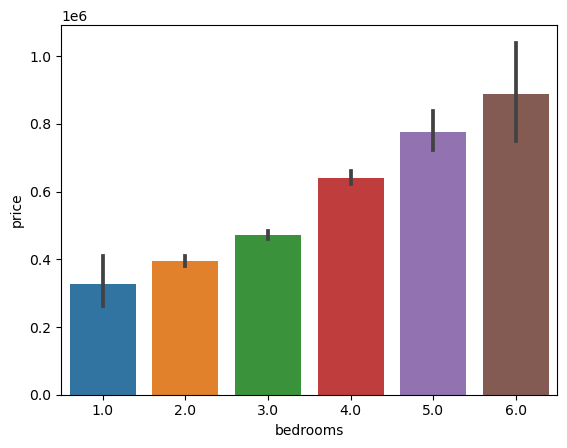

In [239]:
data["bedrooms"]=np.where(data["bedrooms"]==0,1,data["bedrooms"])
data["bedrooms"]=np.where(data["bedrooms"]>=6,6,data["bedrooms"])
sns.barplot(x=data["bedrooms"],y=data["price"])
data["bedrooms"].value_counts().sort_index()

bathrooms
0.00       2
0.75      17
1.00     723
1.25       3
1.50     282
1.75     613
2.00     416
2.25     405
2.50    1162
2.75     267
3.00     160
3.25     133
3.50     158
3.75      34
4.00      21
4.25      22
4.50      25
4.75       7
5.00       5
5.25       4
5.50       4
5.75       1
6.25       1
6.50       1
8.00       1
Name: count, dtype: int64

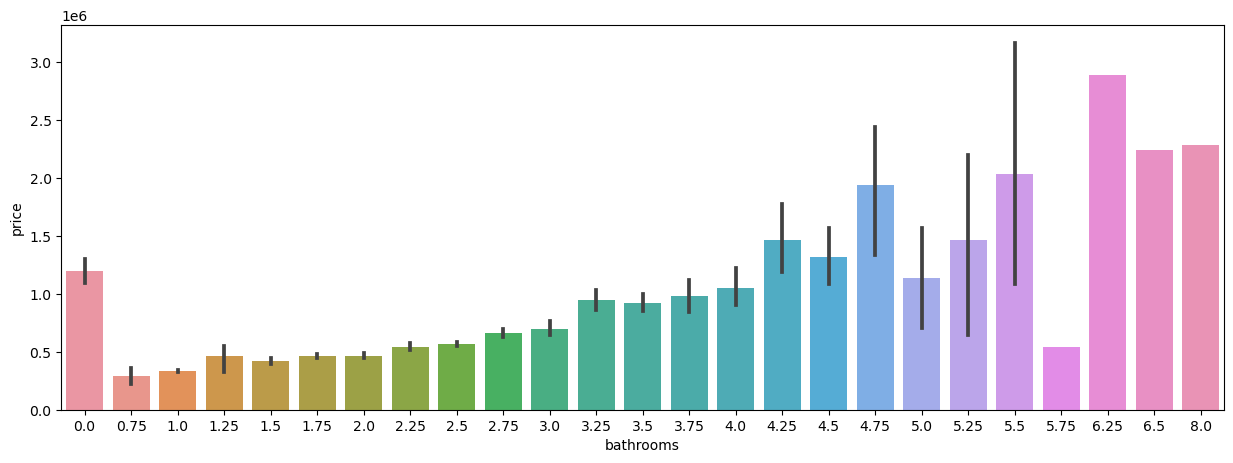

In [240]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["bathrooms"],y=data["price"])
data["bathrooms"].value_counts().sort_index()

bathrooms
1.00     742
1.25       3
1.50     282
1.75     613
2.00     417
2.25     405
2.50    1162
2.75     267
3.00     160
3.25     133
3.75     192
4.00      91
Name: count, dtype: int64

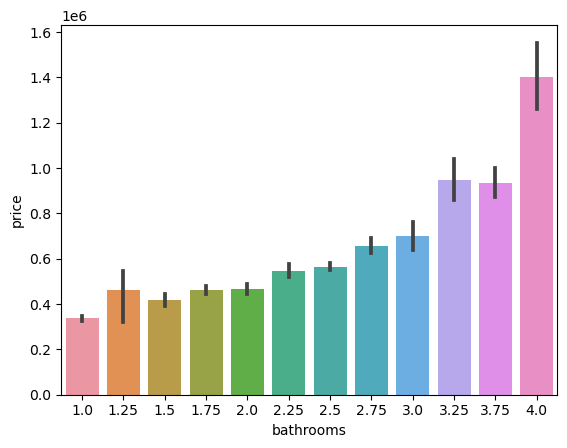

In [241]:
data["bathrooms"]=np.where(data["bathrooms"]==5.75,2,data["bathrooms"])
data["bathrooms"]=np.where(data["bathrooms"]>=4,4,data["bathrooms"])
data["bathrooms"]=np.where(data["bathrooms"]<=1,1,data["bathrooms"])
data["bathrooms"]=np.where(data["bathrooms"]==3.5,3.75,data["bathrooms"])


sns.barplot(x=data["bathrooms"],y=data["price"])
data["bathrooms"].value_counts().sort_index()

view
0.0    4034
1.0      66
2.0     192
3.0     113
4.0      62
Name: count, dtype: int64

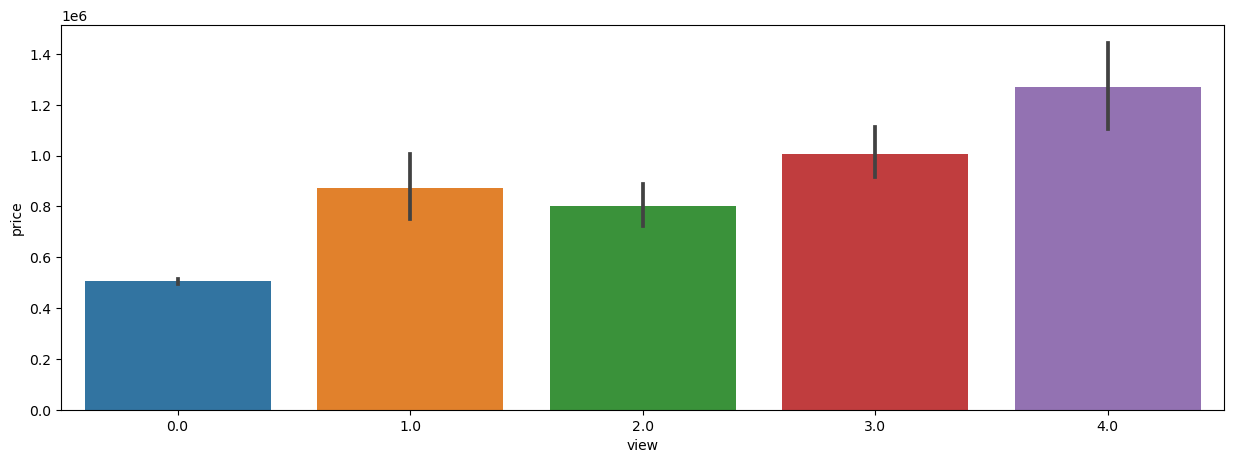

In [242]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["view"],y=data["price"])
data["view"].value_counts().sort_index()

floors
1.0    2098
1.5     435
2.0    1768
2.5      41
3.0     123
3.5       2
Name: count, dtype: int64

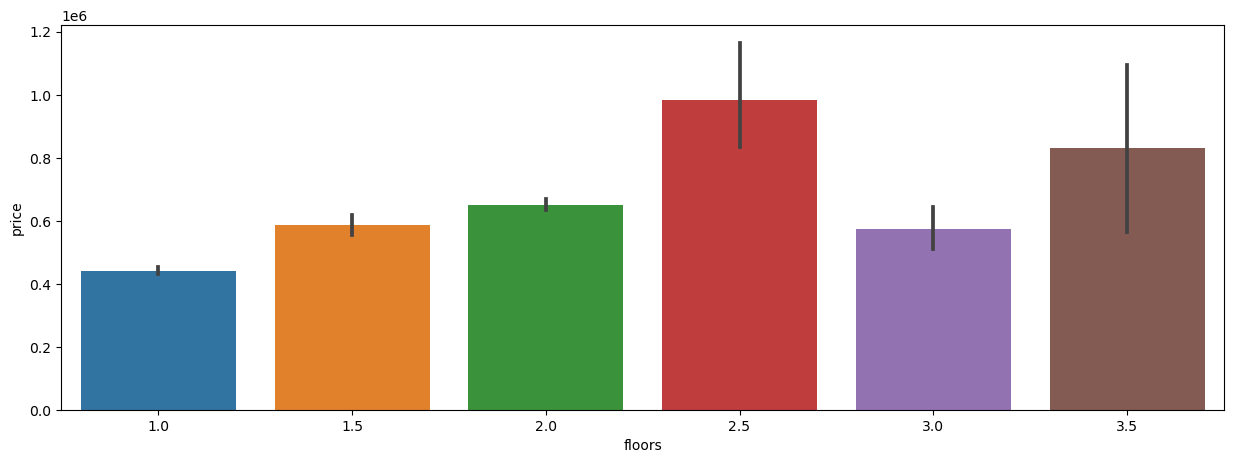

In [243]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["floors"],y=data["price"])
data["floors"].value_counts().sort_index()

<class 'numpy.ndarray'>


floors
1.0    2098
1.5     435
2.0    1768
2.5     166
Name: count, dtype: int64

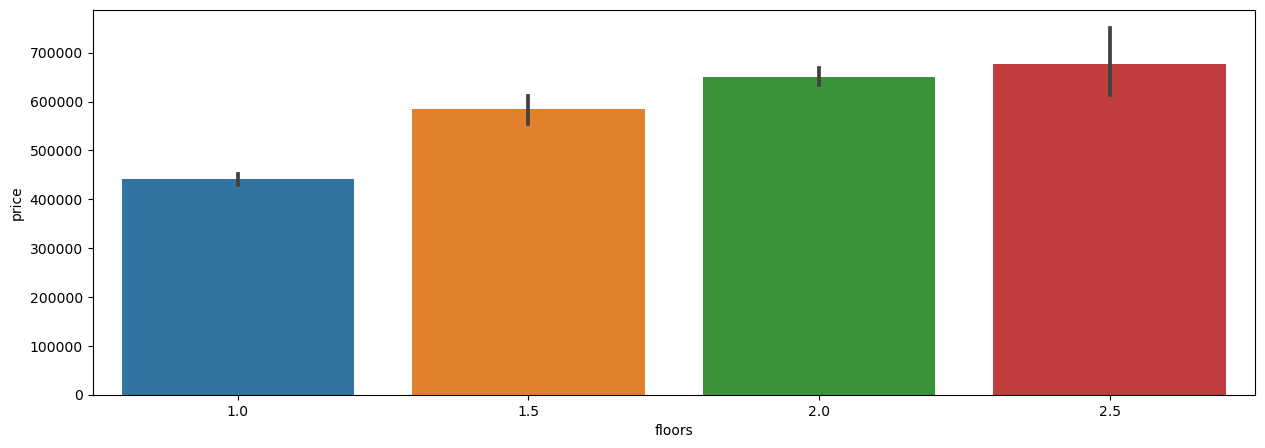

In [244]:
print(type(np.where(data["floors"]>=2.5,2.5,data["floors"])))
np.where(data["floors"]>=2.5,2.5,data["floors"])
data["floors"]=np.where(data["floors"]>=2.5,2.5,data["floors"])
plt.figure(figsize=(15,5))
sns.barplot(x=data["floors"],y=data["price"])
data["floors"].value_counts().sort_index()


In [245]:
plt.figure(figsize=(15,5))
print(type(data.corr(numeric_only=True)))
data.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
price,1.000000,0.341082,0.511456,0.691183,0.288168,0.170847,0.384587,0.592845,0.574150
bedrooms,0.341082,1.000000,0.535037,0.605164,0.204365,-0.015915,0.111303,0.491787,0.487880
bathrooms,0.511456,0.535037,1.000000,0.742059,0.523837,0.037432,0.191359,0.674289,0.670872
sqft_living,0.691183,0.605164,0.742059,1.000000,0.385148,0.068844,0.299158,0.873862,0.860026
floors,0.288168,0.204365,0.523837,0.385148,1.000000,0.016865,0.034816,0.568141,0.569653
waterfront,0.170847,-0.015915,0.037432,0.068844,0.016865,1.000000,0.343757,0.047151,0.047823
view,0.384587,0.111303,0.191359,0.299158,0.034816,0.343757,1.000000,0.167745,0.153385
sqft_above,0.592845,0.491787,0.674289,0.873862,0.568141,0.047151,0.167745,1.000000,0.993711
sqft_basement,0.574150,0.487880,0.670872,0.860026,0.569653,0.047823,0.153385,0.993711,1.000000


<Figure size 1500x500 with 0 Axes>

<Axes: >

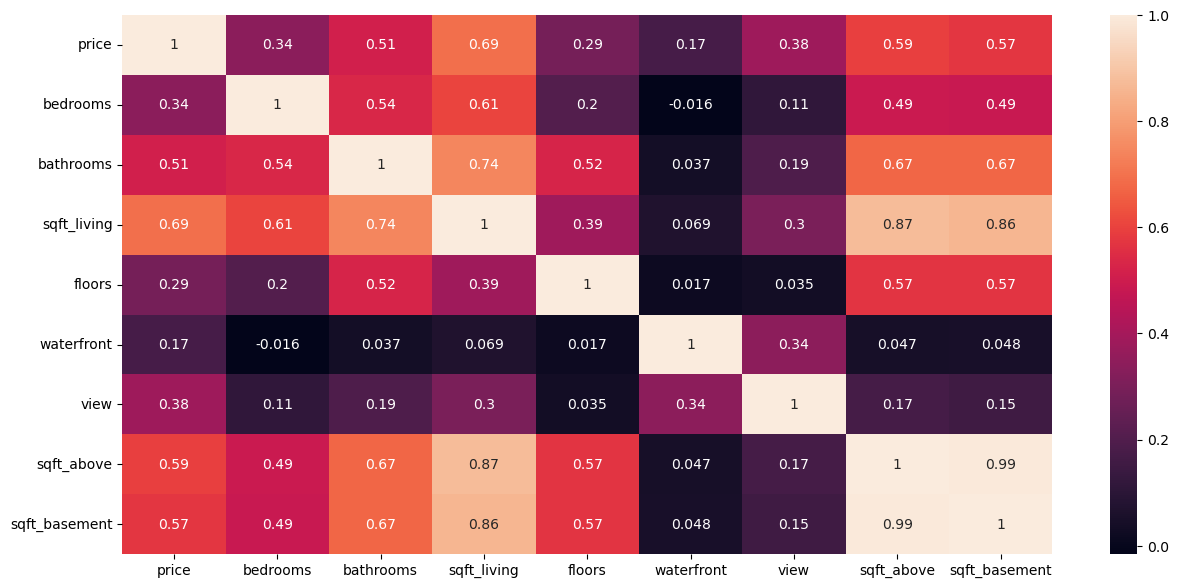

In [246]:
plt.figure(figsize=(15,7))
sns.heatmap(data=data.corr(numeric_only=True),annot=True)

In [247]:
data.drop("sqft_basement",axis=1)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,Seattle,USA


In [248]:
data.describe(include=object)


,city,country
count,4467,4467
unique,44,1
top,Seattle,USA
freq,1530,4467


In [249]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()
# encoder.fit_transform(data["city"])
X=data.drop(["price"],axis=1)
X=pd.get_dummies(data=X,columns=["city","country"])
y=data["price"]

model=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=41)


In [250]:
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7072437262698794
0.6730713387629608
